# CLIMADA DEMO

Prepared by G. Aznar Siguan

The functionality of climada is gathered in the following classes:
* Entity: socio-economic models/data
  * Exposures: exposed values
  * ImpactFuncSet: collection of impact functions per hazard
  * DiscRates: discount rates
  * MeasureSet: collection of measures for adaptation
* Hazard: meteorological models/data
  * TropCyclone: tropical cyclone hazards
* Impact: impact results

Currently climada is able to read and load data of files containing the already modelled data (as for instance products of the climada MATLAB code), to visualize those and perform some basic analysis, and to compute the impact. Climada in Python can also model tropical cyclones from the IBTrACS tracks repository and generate probabilistic ones.

After the installation of climada, and with the climada_env virtual environment activated (if using virutal environments), some of climada classes, functions and constants are directly ready to import. For developers: they are the ones which are defined inside the \__all\__ command on top of each climada module.

# Case: Hurricane Andrew (Florida 1992)

## Entity

The entity class is just a container for the exposures, impact functions, discount reates and measures. It can be set with default values just by instantiation.
 
The data used as default is configurable through a configuration file. Climada comes with a configuration file and the user is free to define his own file by following the instructions in [Configuration options](https://github.com/davidnbresch/climada_python/blob/master/README.md).

In [1]:
from climada import Entity
ent_fl = Entity() # Entity class instantiation with default values

2018-07-27 16:30:32,487 - climada - DEBUG - Loading default config file: /Users/aznarsig/Documents/Python/climada_python/climada/conf/defaults.conf


/Users/aznarsig/anaconda3/envs/climada/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


2018-07-27 16:30:34,797 - climada.entity.exposures.base - INFO - Reading file: /Users/aznarsig/Documents/Python/climada_python/data/system/entity_template.xlsx
2018-07-27 16:30:34,933 - climada.util.checker - INFO - Exposures.assigned not set. 
2018-07-27 16:30:34,934 - climada.entity.impact_funcs.impact_func_set - INFO - Reading file: /Users/aznarsig/Documents/Python/climada_python/data/system/entity_template.xlsx
2018-07-27 16:30:35,028 - climada.entity.measures.base - INFO - Reading file: /Users/aznarsig/Documents/Python/climada_python/data/system/entity_template.xlsx
2018-07-27 16:30:35,099 - climada.entity.disc_rates.base - INFO - Reading file: /Users/aznarsig/Documents/Python/climada_python/data/system/entity_template.xlsx


The `impact_funcs` attribute is of type `ImpactFuncSet`. As such, it contains different impact functions for different hazards:

List of impact function's ids for every hazard type:
{'TC': [1, 3], 'TS': [1], 'WS': [1], 'EQ': [1], 'VQ': [1], 'TR': [1], 'LS': [1], 'FL': [1], 'HS': [1], 'BF': [1]}

Impact functions graphs:


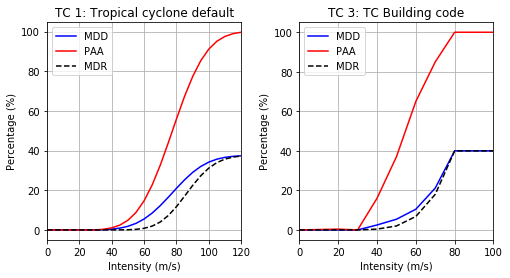

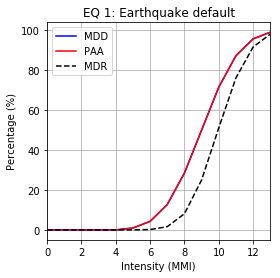

In [2]:
% matplotlib inline
print("List of impact function's ids for every hazard type:")
print(ent_fl.impact_funcs.get_ids()) # List of impact function's ids for every hazard type
print('\nImpact functions graphs:')
ent_fl.impact_funcs.plot('TC'); # tropical cyclone impact functions
ent_fl.impact_funcs.plot('EQ'); # earthquake impact functions

Information and exercises about impact functions, numpy and matplotlib in [Hands-on_II](Hands-on_II.ipynb#climada-I:-Impact-Functions-(using-numpy and-matplotlib).

The `measures` attribute is of type `MeasureSet`. This class is a container of `Measure` instances, the same as `ImpactFuncSet` containing several `ImpactFunc`. This class is not used for impact calculations, but for building adaptation strategies:

In [3]:
help(ent_fl.measures)

Help on MeasureSet in module climada.entity.measures.base object:

class MeasureSet(builtins.object)
 |  Contains measures of type Measure. Loads from
 |  files with format defined in FILE_EXT.
 |  
 |  Attributes:
 |      tag (Tag): information about the source data
 |      _data (dict): cotains Measure classes. It's not suppossed to be
 |          directly accessed. Use the class methods instead.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, file_name='', description='')
 |      Fill values from file, if provided.
 |      
 |      Parameters:
 |          file_name (str or list(str), optional): absolute file name(s) or
 |              folder name containing the files to read
 |          description (str or list(str), optional): one description of the
 |              data or a description of each data file
 |      
 |      Raises:
 |          ValueError
 |      
 |      Examples:
 |          Fill MeasureSet with values and check consistency data:
 |      
 |          >>> act_1

The `disc_rates` attribute is of type `DiscRates` and it simply contains the discount rates for every year, currently:

(<Figure size 288x288 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x1a10d13400>])

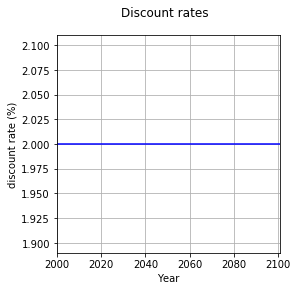

In [4]:
ent_fl.disc_rates.plot()

Finally, the `exposures` attribute contains geolocalized values of anything exposed to the hazard, let it be monetary value of assets or number of human lifes, for example. It is of type `Exposures`. 

In this case, we want to fix the exposures for the assets located in Florida. We will use the data in file `ENT_FL_MAT`.

2018-07-27 16:30:36,060 - climada.entity.exposures.base - INFO - Reading file: /Users/aznarsig/Documents/Python/climada_python/data/demo/USA_UnitedStates_Florida_entity.mat
2018-07-27 16:30:36,133 - climada.util.checker - INFO - Exposures.category_id not set. 
2018-07-27 16:30:36,134 - climada.util.checker - INFO - Exposures.region_id not set. 
2018-07-27 16:30:36,135 - climada.entity.exposures.base - WARNING - Exposures.assigned: assigned hazard type not set.


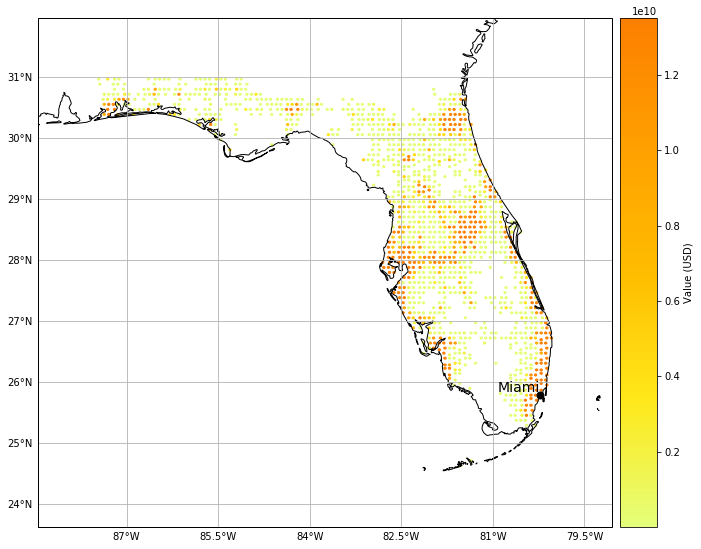

In [5]:
from climada import Exposures, ENT_FL_MAT

ent_fl.exposures = Exposures(ENT_FL_MAT)
ent_fl.exposures.value_unit = 'USD'      # fill missing ('NA') value unit 
ent_fl.exposures.plot(ignore_null=True); # plot removing 0 values

The detailed description and exercises on the `Exposures` class can be found in [Hands-on_III - Exposures](Hands-on_III.ipynb#Exposures-class). There is a brief explanation of the libraries pandas and cartopy as well.

Furthermore, any country or region can be modelled using the black marble methodology of the `BlackMarble` class. This is explained in [Hands-on_V](Hands-on_V.ipynb).

## Hazard tropical cyclone

### Centroids

The centroids are the geographical coordinates where there is information about the hazard. Usually, the hazard events are interpolated to these coordinates. They can be defined through the class `Centroids`.

In this example, we will a grid that covers Florida and the hurricane Andrew. This can be something like that:

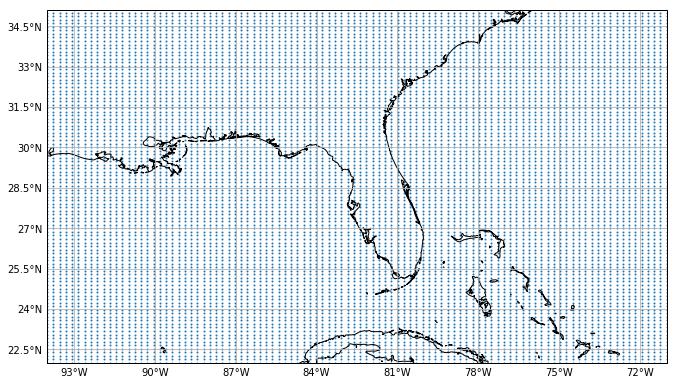

In [6]:
import numpy as np
from climada import Centroids
cent_fl = Centroids()
cent_fl.coord = (np.mgrid[22 : 35 : complex(0, 100), -94 : -71 : complex(0, 100)]).reshape(2, 10000).transpose()
cent_fl.id = np.arange(cent_fl.lat.size)
cent_fl.plot();

See [Hands-on_III - Centroids](Hands-on_III.ipynb#Centroids-class).

### TropCyclone

Tropical cyclones can be modelled from historical event tracks, in particular from [IBTrACS](https://www.ncdc.noaa.gov/ibtracs/) data. The tracks can be loaded and manipulated with `TCTracks` class. This generates as well synthetic events from the historical ones. 

`TC_ANDREW_FL` file contains the IBrTRACS track of hurricane Andrew in 1992 over Florida.

In [7]:
from climada import TCTracks, TropCyclone, TC_ANDREW_FL

In [8]:
help(TCTracks)

Help on class TCTracks in module climada.hazard.tc_tracks:

class TCTracks(builtins.object)
 |  Contains tropical cyclone tracks.
 |  
 |  Attributes:
 |      data (list(xarray.Dataset)): list of tropical cyclone tracks. Each
 |          track contains following attributes:
 |              - time (coords)
 |              - lat (coords)
 |              - lon (coords)
 |              - time_step
 |              - radius_max_wind
 |              - max_sustained_wind
 |              - central_pressure
 |              - environmental_pressure
 |              - max_sustained_wind_unit (attrs)
 |              - central_pressure_unit (attrs)
 |              - name (attrs)
 |              - orig_event_flag (attrs)
 |              - data_provider (attrs)
 |              - basin (attrs)
 |              - id_no (attrs)
 |              - category (attrs)
 |          computed during processing:
 |              - on_land
 |              - dist_since_lf
 |  
 |  Methods defined here:
 |  
 |  __init__

(<Figure size 648x936 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x1a1cbbc668>)

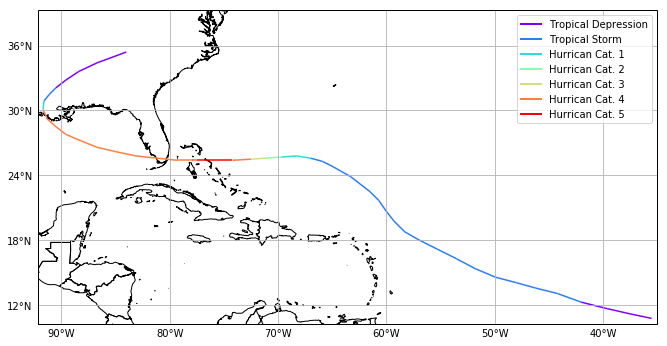

In [9]:
track_andrew = TCTracks()
track_andrew.read_ibtracs_csv(TC_ANDREW_FL)
track_andrew.plot() # plot track

2018-07-27 16:30:48,545 - climada.hazard.tc_tracks - INFO - No historical track of category Tropical Depression. Decay parameters from category Hurrican Cat. 4 taken.
2018-07-27 16:30:48,546 - climada.hazard.tc_tracks - INFO - No historical track of category Tropical Storm. Decay parameters from category Hurrican Cat. 4 taken.
2018-07-27 16:30:48,546 - climada.hazard.tc_tracks - INFO - No historical track of category Hurrican Cat. 1. Decay parameters from category Hurrican Cat. 4 taken.
2018-07-27 16:30:48,547 - climada.hazard.tc_tracks - INFO - No historical track of category Hurrican Cat. 2. Decay parameters from category Hurrican Cat. 4 taken.
2018-07-27 16:30:48,547 - climada.hazard.tc_tracks - INFO - No historical track of category Hurrican Cat. 3. Decay parameters from category Hurrican Cat. 4 taken.
2018-07-27 16:30:48,548 - climada.hazard.tc_tracks - INFO - No historical track of category Hurrican Cat. 5. Decay parameters from category Hurrican Cat. 4 taken.
The synthetic track

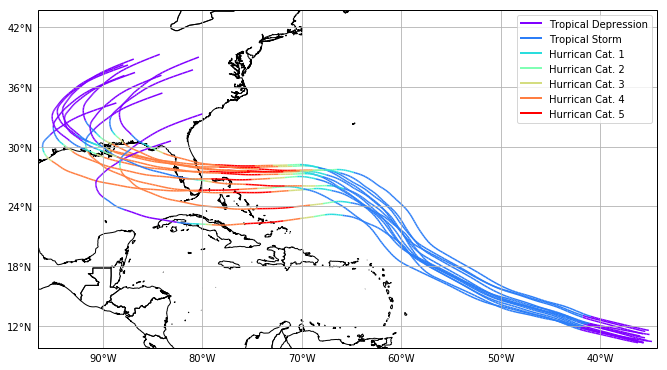

In [10]:
# Generate synthetic events
import time
time0 = time.time()
track_andrew.calc_random_walk(ens_size=12) # For every track, generate 12 synthetic
timef = time.time()
print('The synthetic track generation took', timef - time0, 'seconds')
track_andrew.equal_timestep()
track_andrew.plot()
print('Number of tracks:', track_andrew.size)

`TropCyclone` class ingests the tracks and models the wind gusts in the provided centroids.

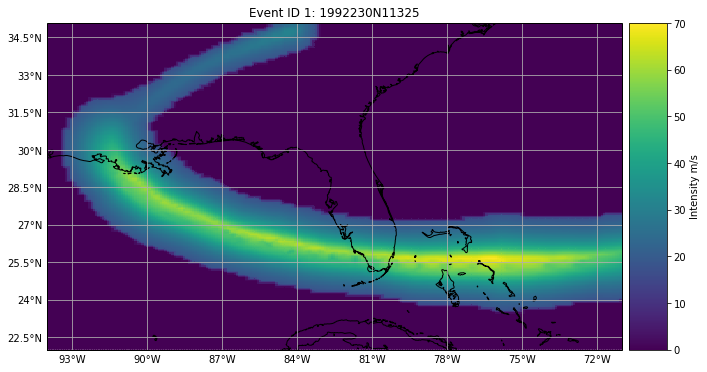

In [11]:
tc_andrew = TropCyclone() # instance TropCyclone
tc_andrew.set_from_tracks(track_andrew, centroids=cent_fl) # set hazard from track file with given centroids
tc_andrew.plot_intensity(tc_andrew.event_name[0]); # plot intensity of one event

A more completed set of tropical cyclones events in Florida can be found in file `HAZ_DEMO_MAT`. This contains 1445 historical events from year 1851 to 2011 and 9 synthetical events for each historical one.

In [12]:
from climada import HAZ_DEMO_MAT
tc_fl = TropCyclone()
tc_fl.read(HAZ_DEMO_MAT, 'Historic and synthetic tropical cyclones in Florida from 1851 to 2011.')

2018-07-27 16:31:19,904 - climada.hazard.base - INFO - Reading file: /Users/aznarsig/Documents/Python/climada_python/data/demo/atl_prob.mat
2018-07-27 16:31:19,951 - climada.hazard.centroids.base - INFO - Reading file: /Users/aznarsig/Documents/Python/climada_python/data/demo/atl_prob.mat
2018-07-27 16:31:19,988 - climada.util.checker - INFO - Centroids.region_id not set. 
2018-07-27 16:31:19,989 - climada.util.checker - INFO - Centroids.dist_coast not set. 


There are two events called `ANDREW` in Florida:

The first ANDREW happened in 1986-06-05
The second ANDREW happened in 1992-08-16


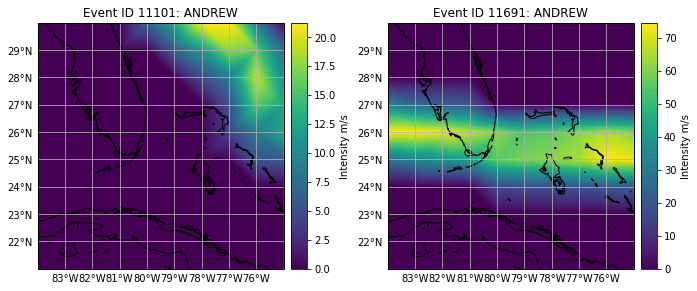

In [13]:
print('The first ANDREW happened in', tc_fl.get_event_date('ANDREW')[0])
print('The second ANDREW happened in', tc_fl.get_event_date('ANDREW')[1])
tc_fl.plot_intensity(event='ANDREW'); # Plot all ANDREW events

In a specific point, for example (lat, lon) = (26, -81), the tropical cyclones have had the following maximum intensities:

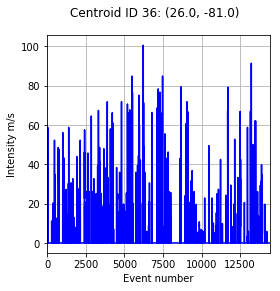

In [14]:
tc_fl.plot_intensity(centr=(26, -81));

Also, the intensity maps for different return periods can be representative for such an amount of events:

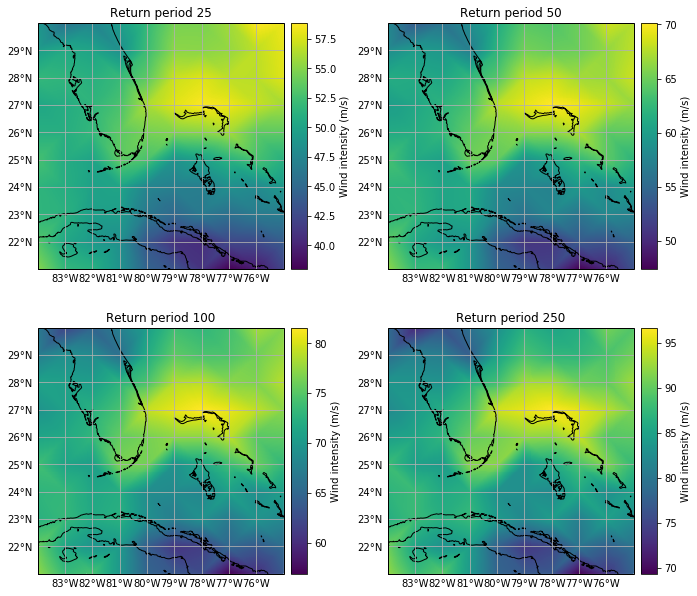

In [15]:
tc_fl.plot_rp_intensity();

To see how the `TropCyclone` class works, see [Hands-on_IV](Hands-on_IV.ipynb#climada-III:-Hazard-and-TropicCyclone-(using-xarray-and-pint), where the `Hazard` class and `trop_cyclone` module are explained, as well as the xarray and pint libraries.

## Impact

The impact of hazard events over an entity can be computed easily from the previously explained classes. By computing the impact for each event, the `Impact` class provides different risk measures, as the expected annual impact per exposure, the probable maximum impact for different return periods and the total average annual impact.

This is the impact of scenario ANDREW in Florida. We call scenario to the historical event and its synthetic reproductions. Analyzing the scenario instead of the single historical event enables to take into account the uncertainties of such events.

2018-07-27 16:31:45,955 - climada.util.interpolation - WARNING - Distance to closest centroid is greater than 100km for 103056 coordinates.
2018-07-27 16:31:45,959 - climada.engine.impact - INFO - Calculating damage for 1301 assets (>0) and 13 events.
Expected average annual impact of an ANDREW scenario: 3.272e+09 USD


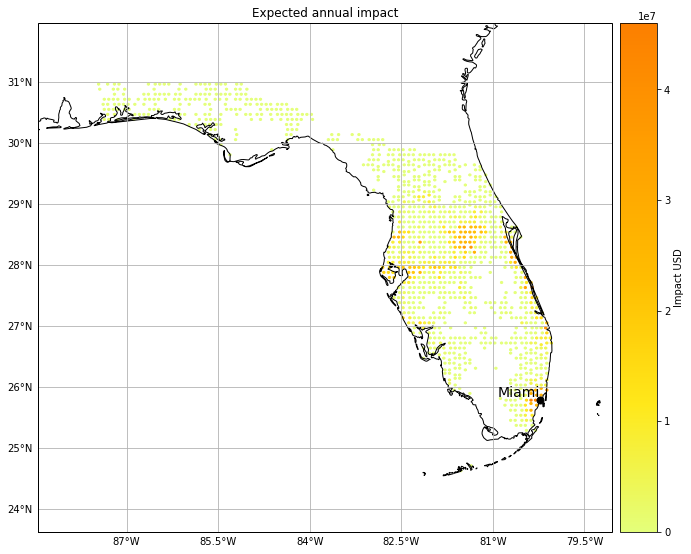

In [16]:
from climada import Impact
imp_andrew = Impact()
# Compute impact of hurricane Andrew in tc_andrew over Florida entity:
imp_andrew.calc(ent_fl.exposures, ent_fl.impact_funcs, tc_andrew)
imp_andrew.plot_eai_exposure(); # average annual impact at each exposure
print('Expected average annual impact of an ANDREW scenario: {:.3e} {}'.format(imp_andrew.aai_agg, imp_andrew.unit))

If we take into account all the historical and synthetic events of tropical cyclones in Florida, the impact exceedence frequency curve can be computed and a reliable approximation of the average annual impact (aggregated) is obtained:

2018-07-27 16:31:50,664 - climada.util.interpolation - WARNING - Distance to closest centroid is greater than 100km for 116336 coordinates.
2018-07-27 16:31:50,666 - climada.engine.impact - INFO - Calculating damage for 1140 assets (>0) and 14450 events.
Expected average annual impact: 5.210e+09 USD


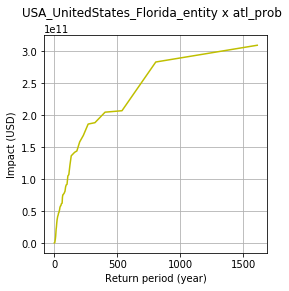

In [17]:
# remove previous assigned centroids
ent_fl.exposures.assigned = dict()
# compute new impact
imp_fl = Impact()
# Compute impact over Florida:
imp_fl.calc(ent_fl.exposures, ent_fl.impact_funcs, tc_fl)
freq_curve_fl = imp_fl.calc_freq_curve() # impact exceedence frequency curve
freq_curve_fl.plot();
print('Expected average annual impact: {:.3e} USD'.format(imp_fl.aai_agg))

The average annual impact per exposure is:

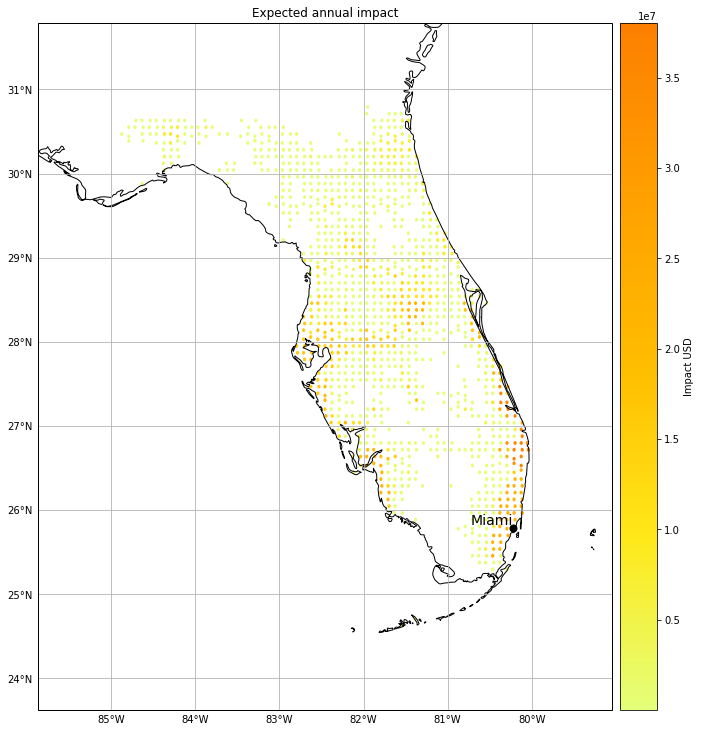

In [18]:
imp_fl.plot_eai_exposure(); # average annual impact at each exposure

Finally, we can save our variables in pickle format using the `save` function. This will save your results in the folder specified in the configuration file. The default folder is a `results` folder which is created in the current path.

In [19]:
from climada import save
save('impact_florida.p', imp_fl)

2018-07-27 16:31:56,231 - climada.util.save - INFO - Written file /Users/aznarsig/Documents/Python/climada_python/script/workshop_I/results/impact_florida.p


Later, the data can be read as follows:

In [20]:
import pickle
import os
abs_path = os.path.join(os.getcwd(), 'results/impact_florida.p') # absolute path
with open(abs_path, 'rb') as f:
    data = pickle.load(f)

print('Data read:', type(data))

Data read: <class 'climada.engine.impact.Impact'>


# Your case

### EXERCISE:

1. Build an entity. It might be one from your previous runs in MATLAB. Make sure i'is saved in version > v7.3 if it's a MATLAB file. If it's not, you'll get an error message. Then, you can save it again in MATLAB like that:
`save('file_name.mat','variable_name', '-v7.3')`

2. Build a hazard. It might also come from a previous run in MATLAB. This file might already contain the centroids. If not, define the centroids as well and use them in your calculations.

3. Compute the impact.

4. Visualization. Plot:
   * the damage functions for the hazard
   * the entity values map
   * the strongest event intensity
   * the maximum hazard intensity of all the events in Zürich (47.38, 8.54)
   * the impact exceedence frequency curve


In [21]:
# Put your code here






2018-07-27 16:31:56,264 - climada.entity.exposures.base - INFO - Reading file: /Users/aznarsig/Documents/Python/climada_python/data/demo/WS_Europe.xls
2018-07-27 16:31:56,541 - climada.util.checker - INFO - Exposures.category_id not set. 
2018-07-27 16:31:56,541 - climada.util.checker - INFO - Exposures.region_id not set. 
2018-07-27 16:31:56,542 - climada.util.checker - INFO - Exposures.assigned not set. 
2018-07-27 16:31:56,543 - climada.entity.impact_funcs.impact_func_set - INFO - Reading file: /Users/aznarsig/Documents/Python/climada_python/data/demo/WS_Europe.xls
2018-07-27 16:31:56,671 - climada.hazard.base - INFO - Reading file: /Users/aznarsig/Documents/Python/climada_python/data/demo/WS_ERA40.mat
2018-07-27 16:31:56,880 - climada.hazard.centroids.base - INFO - Reading file: /Users/aznarsig/Documents/Python/climada_python/data/demo/WS_ERA40.mat
2018-07-27 16:31:57,081 - climada.util.checker - INFO - Centroids.region_id not set. 
2018-07-27 16:31:57,082 - climada.util.checker - 

(<Figure size 288x288 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x1a1ec43ac8>])

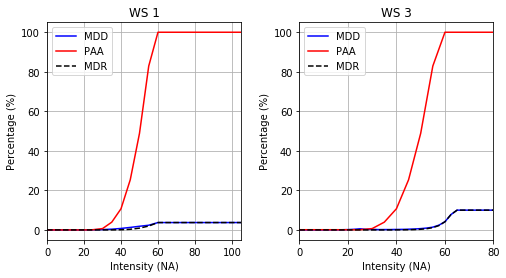

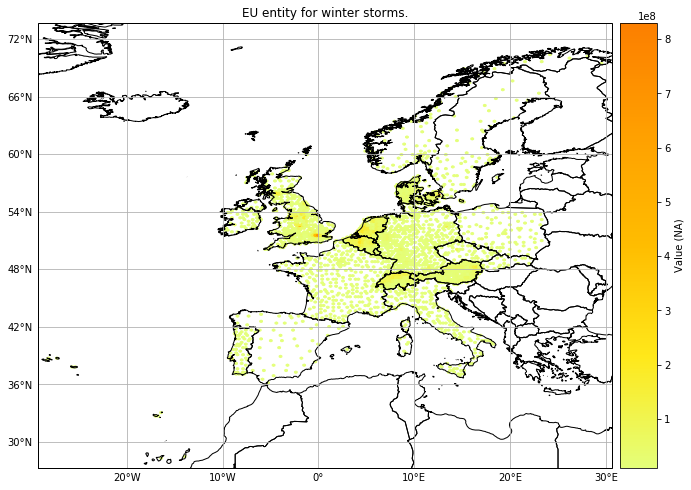

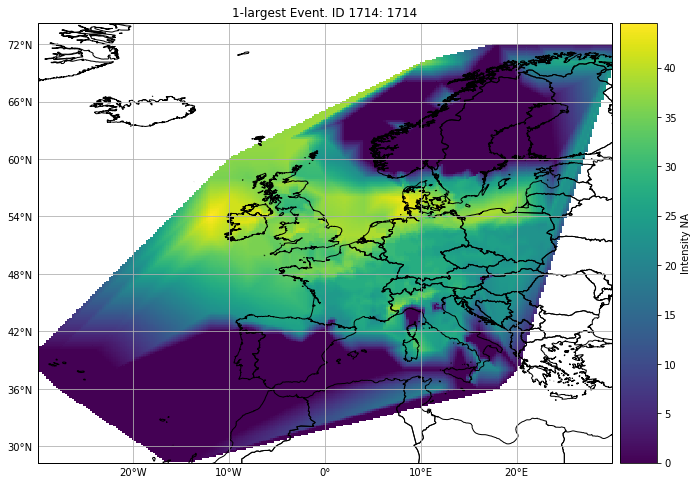

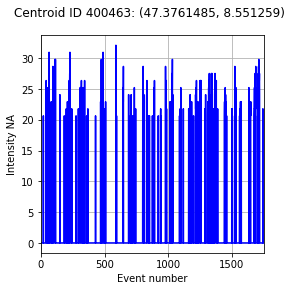

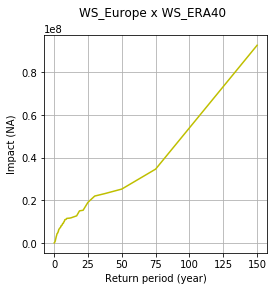

In [22]:
# SOLUTION: example: winter storms in europe
# Put any absoulte path for your files or set up the configuration variable "repository"
from climada import DATA_DIR
FILE_HAZARD = DATA_DIR + '/demo/WS_ERA40.mat' 
FILE_ENTITY = DATA_DIR + '/demo/WS_Europe.xls'

from climada import Hazard, Exposures, ImpactFuncSet, Impact

# 1. Entity: we only need impact functions and exposures to compute the impact
# Exposures
exp_ws_eu = Exposures()
# as seen in Hands-on_III, the variable names in the file can be changed
var_names = exp_ws_eu.get_def_file_var_names('.xls')
var_names['col_name']['imp'] = 'VulnCurveID'
exp_ws_eu.read(FILE_ENTITY, 'EU entity for winter storms.', var_names=var_names)

# Impact functions
impf_ws_eu = ImpactFuncSet()
var_names = impf_ws_eu.get_def_file_var_names('.xls')
var_names['col_name']['func_id'] = 'VulnCurveID'
impf_ws_eu.read(FILE_ENTITY, 'Impact functions for winter storms in EU.', var_names=var_names)

# 2. Hazard
haz_ws_eu = Hazard('WS', FILE_HAZARD, 'WS EU ERA 40')

# 3. Impact
imp_ws_eu = Impact()
imp_ws_eu.calc(exp_ws_eu, impf_ws_eu, haz_ws_eu)

# 4.
# the damage functions for the hazard
impf_ws_eu.plot()

# the entity values map
exp_ws_eu.plot(pop_name=False)

# the strongest event
haz_ws_eu.plot_intensity(-1) # might be better to use an other earth projection?

# the hazard intensity maps for different return periods
haz_ws_eu.plot_intensity(centr=(47.38, 8.54))

# the impact exceedence frequency curve
imp_exc_curve = imp_ws_eu.calc_freq_curve()
imp_exc_curve.plot()